### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
%pip install mlxtend==0.23.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
#1
df = pd.read_excel("https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx")
df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [4]:
df.isnull().sum()

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64

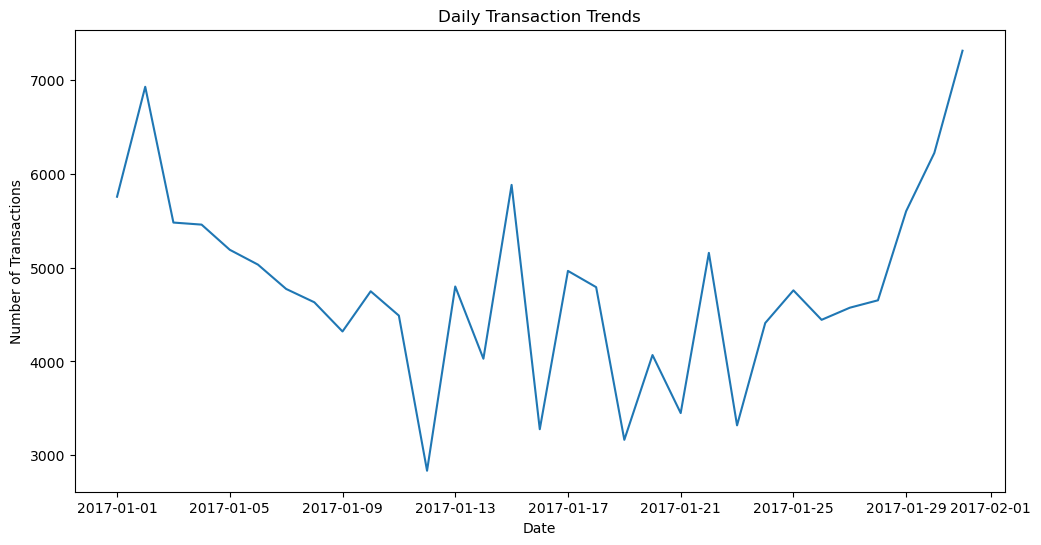

In [5]:
from matplotlib import pyplot as plt
df["TGL_TRANS"] = pd.to_datetime(df["TGL_TRANS"], format = "%d-%m-%Y")
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS']).dt.date

daily_transactions = df.groupby('TGL_TRANS')['NO_BKT'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['TGL_TRANS'], daily_transactions['NO_BKT'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.show()

In [8]:
# Convert 'TGL_TRANS' column to datetime if it is not already
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'], errors='coerce')

# Now, extract the day of the week
df['Days'] = df['TGL_TRANS'].dt.day_name()

# Group by 'Days' and sum up transactions for each day
daily_transactions_count = df.groupby('Days').size().reset_index(name='Transaction_Count')

# Ensure 'Days' is ordered (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions_count['Days'] = pd.Categorical(daily_transactions_count['Days'], categories=day_order, ordered=True)

# Sort by the correct day order
daily_transactions_count = daily_transactions_count.sort_values('Days')

# Display the result
print(daily_transactions_count)


        Days  Transaction_Count
1     Monday              24061
5    Tuesday              26908
6  Wednesday              19493
4   Thursday              15633
0     Friday              18469
2   Saturday              16902
3     Sunday              27020


C:\Users\yulia\AppData\Local\Temp\ipykernel_4544\335152312.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', palette='viridis')


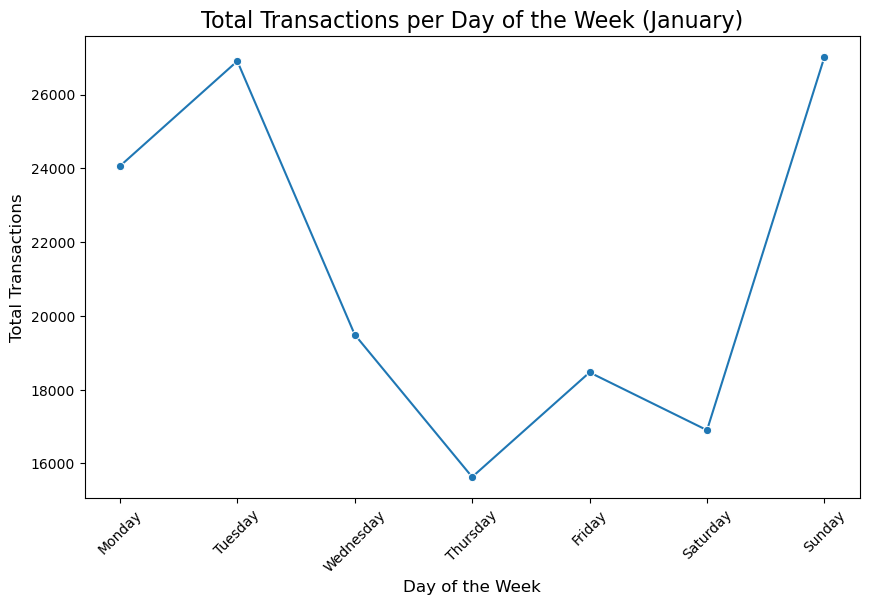

In [9]:
import seaborn as sns

# Plotting with Seaborn (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', palette='viridis')

# Add labels and title
plt.title('Total Transactions per Day of the Week (January)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(rotation=45)  # Rotate day labels for better readability

# Show the plot
plt.show()


Thursday have the lowest sales while Tuesday and Sunday is the highest.

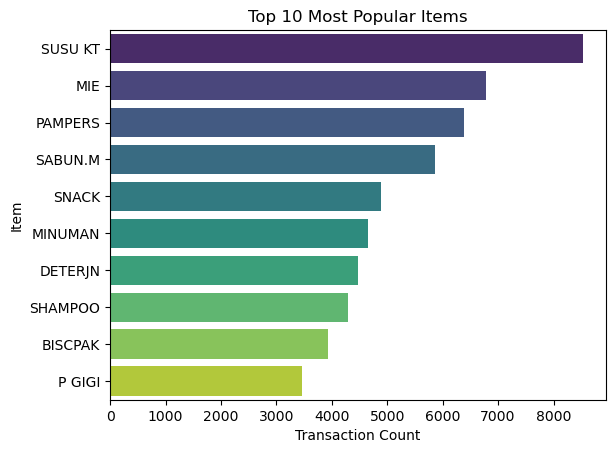

In [36]:
item_popularity = df['KEL'].value_counts().reset_index()

# Rename the columns for better readability
item_popularity.columns = ['KEL', 'NO_BKT']

# Display the top 10 most popular items
top_items = item_popularity.head(10)

# Optional: Visualize the top items using a bar chart
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top 10 most popular items
sns.barplot(x='NO_BKT', y='KEL', data=top_items, palette='viridis')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Transaction Count')
plt.ylabel('Item')
plt.show()


APRIORI

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

basket = df.groupby(['NO_BKT','KEL'])['KEL'].count().unstack().reset_index().fillna(0).set_index('NO_BKT')
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
basket = df.pivot_table(index='NO_BKT', columns='KEL', aggfunc='size', fill_value=0)

# Step 2: Convert all values greater than 1 to 1 (binary format)
basket[basket > 1] = 1

# Display the first few rows of the transformed dataframe
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Step 1: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Display the frequent itemsets with support
frequent_itemsets.head(35)

c:\Users\yulia\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


The table shows the **support** values of various products based on how frequently they are purchased together in transactions. Here's a summary of the findings:

- **High support**: Products like **Pampers (0.14)**, **MINUMAN (beverages, 0.09)**, and **SABUN.M (soap, 0.09)** are commonly bought and form significant parts of the shopping cart.
- **Moderate support**: Items such as **DETERJN (detergent, 0.06)** and **KOPI (coffee, 0.04)** are also regularly purchased, though less frequently than the top products.
- **Low support**: Products like **ROTI.B (bread, 0.03)** and **ROKOK (cigarettes, 0.03)** appear less often in transactions, indicating niche markets or less frequent purchases.

These insights can help businesses in **bundling**, **targeted offers**, and **cross-selling** strategies based on customer buying behavior.


Based on the association rules and support values, here are some business recommendations:

Focus on high-support products: Products like Pampers, MINUMAN (beverages), and SABUN.M (soap), which have the highest support values, are purchased frequently and should be the focus of marketing efforts. Promotions, discounts, or loyalty programs centered around these products could boost customer engagement.

Cross-selling opportunities: Products with moderate to high support, such as DETERJN (detergent), KOPI (coffee), and SABUN.C (soap), often appear together in transactions. This presents a good opportunity to create bundles or package deals that encourage customers to buy related products. For example, you could offer discounts on coffee and snacks or detergent and fabric softener.

Promotions and seasonal offers: Products like PAMPERS, SABUN.M, and MIE (instant noodles) that have high support could be included in seasonal promotions or flash sales, as these are frequently purchased and have broad customer appeal. Timing these offers with holiday seasons or special events might further boost sales.

Targeted marketing for low-support items: For items with low support, such as ROTI.B (bread) or ROKOK (cigarettes), focus on niche marketing. Tailor marketing campaigns for specific customer segments who tend to purchase these products. For example, bread could be targeted towards families, and cigarettes could be marketed through targeted ads to regular smokers.

Inventory management and product stocking: Products with high support like Pampers and MINUMAN should be prioritized in inventory management. Ensure they are always in stock and are prominently displayed to catch the attention of customers. Low-support items might be better managed with just-in-time inventory or placed on special promotions to move stock.

Improve customer loyalty: For products that have both high support and loyalty, such as SABUN.M, create a loyalty program where customers can earn rewards by purchasing these items regularly, thus increasing the likelihood of repeat purchases.

By understanding the frequency of product purchases and how they relate to each other, these strategies can enhance customer satisfaction, increase sales, and improve inventory and marketing management.


